
# Atelier 3 : Classification


# 1.	Objectif :

L’objectif de cet atelier est de découvrir la classification de documents texte à travers plusieure classificateur et que nous allons explorer avec le dataset contenant les news apparus sur le fil de presse Reuters en 1987.

Le datset peut être téléchargé à partir de ce lien :https://archive.ics.uci.edu/dataset/137/reuters+21578+text+categorization+collection

Le dataset est disponible egalement sur nltk et scikitlearn:


In [1]:
import nltk
nltk.download('reuters')

#from sklearn.datasets import fetch_rcv1

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\dscon\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

# 2.	Chargement des données

Nous considerons le dataset reuters  de NLTK.

In [2]:
from nltk.corpus import reuters

#recuperation du vocabulaire du corpus
vocabulaire=reuters.words()

#recuperation de toutes les categories
categories=reuters.categories()

#recuperation de tous les id des fichiers appartenant à une categorie bien determinée
ids_coffe=reuters.fileids("coffee")

#recuperation des mots contenus dans les documents d'une categorie bien determinee
coffe_words=reuters.words(reuters.fileids("coffee"))

#recuperation du texte brut des documents d'une categorie bien determinee
cofee_docs=reuters.raw(reuters.fileids("coffee")[0])

#recuperation de toutes les autres classe d'un document annoté avec une classe bien determinee
classes_Annotated_coffee=reuters.categories(reuters.fileids("coffee"))

#recuperer le dataset d'apprentissage
train_categories=[ reuters.categories(i) for i in reuters.fileids() if i.startswith('training/')]
train_documents = [reuters.raw(i) for i in reuters.fileids() if i.startswith('training/')]

#recuperer le dataset de test
test_documents=[reuters.raw(i)  for i in reuters.fileids() if i.startswith('test/')]
test_categories = [reuters.categories(i) for i in reuters.fileids() if i.startswith('test/')]

# recuperer tout le corpus
whole_docs=[reuters.raw(i)for i in reuters.fileids()]
whole_cats = [ reuters.categories(i) for i in reuters.fileids()]


In [3]:
len(test_documents)

3019

In [4]:
len(categories)

90

In [5]:
len(whole_cats)

10788

In [6]:
len(reuters.raw(reuters.fileids("coffee")[0]))

2530

In [7]:
len(reuters.raw(reuters.fileids("coffee")))


203702

In [8]:
reuters.categories()[:10]

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee']

# 3.	Prétraitements



In [9]:
len(reuters.categories())

90

In [10]:
len(whole_docs)

10788

In [11]:
whole_docs[:10]

['ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT\n  Mounting trade friction between the\n  U.S. And Japan has raised fears among many of Asia\'s exporting\n  nations that the row could inflict far-reaching economic\n  damage, businessmen and officials said.\n      They told Reuter correspondents in Asian capitals a U.S.\n  Move against Japan might boost protectionist sentiment in the\n  U.S. And lead to curbs on American imports of their products.\n      But some exporters said that while the conflict would hurt\n  them in the long-run, in the short-term Tokyo\'s loss might be\n  their gain.\n      The U.S. Has said it will impose 300 mln dlrs of tariffs on\n  imports of Japanese electronics goods on April 17, in\n  retaliation for Japan\'s alleged failure to stick to a pact not\n  to sell semiconductors on world markets at below cost.\n      Unofficial Japanese estimates put the impact of the tariffs\n  at 10 billion dlrs and spokesmen for major electronics firms\n  said they would 

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk, re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

vectorizer = TfidfVectorizer(stop_words = 'english')

#Generer le vocabulaire à partir du whole_docs
#Realiser les differentes operations NLP permettant d'unifier la representation
#vectorielle de tout le corpus


def preprocessing(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = [token for token in word_tokenize(text) if token not in stopwords.words('english')]
    return ' '.join(words)

# Ensure whole_docs is a list of documents
whole_docs = list(whole_docs)
whole_docs = [preprocessing(doc) for doc in whole_docs]
train_documents = [preprocessing(doc) for doc in train_documents]
test_documents = [preprocessing(doc) for doc in test_documents]

vect_whole_docs = vectorizer.fit_transform(whole_docs)
print(vectorizer.get_feature_names_out())
print(f'len {len(vectorizer.get_feature_names_out())}')

#vectoriser les datasets d'apprentissage et de test
vect_train_docs = vectorizer.transform(train_documents)
vect_test_docs = vectorizer.transform(test_documents)
print(vect_train_docs.toarray())



['aa' 'aaa' 'aabex' ... 'zverev' 'zwermann' 'zzzz']
len 34509
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
lens = [ len(doc.split(' ')) for doc in whole_docs ]
print(f'Nombre de mots dans chaque doc {lens}')
print(f"Nombres de docs {len(lens)}")
sum(lens)

Nombre de mots dans chaque doc [447, 64, 109, 100, 103, 116, 241, 34, 69, 391, 60, 148, 166, 53, 301, 60, 82, 60, 248, 163, 69, 67, 104, 132, 60, 49, 62, 117, 60, 65, 21, 169, 453, 416, 152, 20, 109, 51, 133, 58, 105, 144, 117, 52, 22, 48, 459, 113, 60, 62, 124, 55, 264, 51, 81, 17, 98, 16, 74, 66, 27, 79, 16, 126, 36, 18, 37, 61, 18, 39, 16, 34, 28, 27, 21, 105, 59, 27, 265, 48, 120, 17, 22, 198, 96, 115, 19, 40, 41, 19, 17, 33, 56, 17, 18, 16, 117, 20, 35, 126, 16, 40, 60, 13, 54, 45, 90, 25, 94, 24, 44, 336, 76, 2, 131, 63, 40, 20, 102, 54, 53, 35, 19, 529, 109, 27, 14, 16, 18, 15, 16, 23, 16, 41, 160, 14, 65, 76, 179, 35, 76, 253, 38, 145, 81, 17, 131, 30, 107, 17, 24, 23, 135, 78, 12, 30, 58, 22, 49, 54, 39, 21, 39, 17, 73, 69, 322, 19, 18, 239, 98, 16, 58, 62, 65, 20, 20, 75, 30, 16, 39, 98, 50, 106, 348, 17, 59, 124, 33, 59, 165, 18, 17, 53, 66, 111, 239, 61, 104, 72, 35, 20, 66, 117, 151, 133, 57, 48, 68, 182, 239, 109, 16, 18, 55, 193, 26, 69, 115, 333, 174, 15, 35, 18, 189, 1

855324

In [14]:
#recuperer des labels uniques pour les categories
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

train_labels = mlb.fit_transform(train_categories)
test_labels = mlb.transform(test_categories)
whole_labels = mlb.fit_transform(whole_cats)

print(mlb.classes_)
print(whole_labels)


['acq' 'alum' 'barley' 'bop' 'carcass' 'castor-oil' 'cocoa' 'coconut'
 'coconut-oil' 'coffee' 'copper' 'copra-cake' 'corn' 'cotton' 'cotton-oil'
 'cpi' 'cpu' 'crude' 'dfl' 'dlr' 'dmk' 'earn' 'fuel' 'gas' 'gnp' 'gold'
 'grain' 'groundnut' 'groundnut-oil' 'heat' 'hog' 'housing' 'income'
 'instal-debt' 'interest' 'ipi' 'iron-steel' 'jet' 'jobs' 'l-cattle'
 'lead' 'lei' 'lin-oil' 'livestock' 'lumber' 'meal-feed' 'money-fx'
 'money-supply' 'naphtha' 'nat-gas' 'nickel' 'nkr' 'nzdlr' 'oat' 'oilseed'
 'orange' 'palladium' 'palm-oil' 'palmkernel' 'pet-chem' 'platinum'
 'potato' 'propane' 'rand' 'rape-oil' 'rapeseed' 'reserves' 'retail'
 'rice' 'rubber' 'rye' 'ship' 'silver' 'sorghum' 'soy-meal' 'soy-oil'
 'soybean' 'strategic-metal' 'sugar' 'sun-meal' 'sun-oil' 'sunseed' 'tea'
 'tin' 'trade' 'veg-oil' 'wheat' 'wpi' 'yen' 'zinc']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# 4.	Classification avec SVM

In [15]:
#SVM
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

classifier_svm = OneVsRestClassifier(LinearSVC())
classifier_svm.fit(vect_train_docs,train_labels)
test_labels_predict=classifier_svm.predict(vect_test_docs)
report = classification_report(test_labels,test_labels_predict)
print(report)
scores=classifier_svm.score(vect_test_docs,test_labels)
print(scores)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       719
           1       1.00      0.43      0.61        23
           2       1.00      0.64      0.78        14
           3       0.91      0.67      0.77        30
           4       0.88      0.39      0.54        18
           5       0.00      0.00      0.00         1
           6       1.00      0.94      0.97        18
           7       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         3
           9       0.96      0.96      0.96        28
          10       1.00      0.83      0.91        18
          11       0.00      0.00      0.00         1
          12       0.95      0.75      0.84        56
          13       1.00      0.55      0.71        20
          14       0.00      0.00      0.00         2
          15       0.92      0.43      0.59        28
          16       0.00      0.00      0.00         1
          17       0.92    

c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
import pandas as pd
columns= report.split('\n')[0]
data = report.split('\n')[:-1]
df = pd.read_csv('c:\\Users\\dscon\\Documents\\COURS UM6P\\S3\\TEXT-MINING\\score.csv')


In [17]:
df

,id,precision,recall,f1-score,support
0,0,0.99,0.95,0.97,719
1,1,1.00,0.43,0.61,23
2,2,1.00,0.64,0.78,14
3,3,0.95,0.60,0.73,30
4,4,0.88,0.39,0.54,18
...,...,...,...,...,...
85,85,0.94,0.43,0.59,37
86,86,0.93,0.75,0.83,71
87,87,1.00,0.60,0.75,10
88,88,0.00,0.00,0.00,14


# 5.	Classification  SVM avec cross validation

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_samples', 'recall_samples', 'f1_samples']
scores_svm = cross_validate(classifier_svm, vect_whole_docs, whole_labels, cv=3, scoring=scoring)
print(scores_svm['fit_time'])
print(scores_svm['score_time'])
print(scores_svm['test_precision_samples'])
print(scores_svm['test_recall_samples'])
print(scores_svm['test_f1_samples'])




c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\multiclass.py:87: UserWarning: Label not 5 is present in all training examples.
  warnings.warn(
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[1.00844145 1.02443314 0.96584797]
[0.06988668 0.07264233 0.07170463]
[0.86643493 0.88022803 0.88324527]
[0.84632651 0.86370184 0.86209956]
[0.84841431 0.86375468 0.86505655]


c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 6.	Exercice


Q1. Réaliser le même processus avec le KNN et comparer les performances obtenues avec SVM.

Q2. Réaliser le même processus avec une méthode ensembliste et comparer les performances obtenues avec KNN et SVM.

Q3. Réaliser le même processus avec un perceptron multicouche (activation=segmoid logitic, solver=sgd)

Q4. Realiser les même processus en appliquant un features selection SelectKBest de la librairie sklearn





In [34]:
import matplotlib.pyplot as plt

def evaluate_classifier(classifier, train_docs, train_labels, test_docs, test_labels):
    scoring = ['precision_samples', 'recall_samples', 'f1_samples']
    scores = cross_validate(classifier, train_docs, train_labels, cv=3, scoring=scoring, return_train_score=False)
    classifier.fit(train_docs, train_labels)
    test_predict_labels = classifier.predict(test_docs)
    report = classification_report(test_labels, test_labels_predict, output_dict=True)
    return scores, report

def compare_classifiers(classifier1_scores, classifier2_scores, names):
    metrics = ['fit_time', 'score_time', 'test_precision_samples', 'test_recall_samples', 'test_f1_samples']
    
    classifier1_values = [
        np.mean(classifier1_scores['fit_time']),
        np.mean(classifier1_scores['score_time']),
        np.mean(classifier1_scores['test_precision_samples']),
        np.mean(classifier1_scores['test_recall_samples']),
        np.mean(classifier1_scores['test_f1_samples'])
    ]

    classifier2_values = [
        np.mean(classifier2_scores['fit_time']),
        np.mean(classifier2_scores['score_time']),
        np.mean(classifier2_scores['test_precision_samples']),
        np.mean(classifier2_scores['test_recall_samples']),
        np.mean(classifier2_scores['test_f1_samples'])
    ]

    # Affichage des résultats
    x = np.arange(len(metrics))
    width = 0.35  # Largeur des barres

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, classifier1_values, width, label=f'{names[0]}', color='skyblue')
    rects2 = ax.bar(x + width/2, classifier2_values, width, label=f'{names[1]}', color='salmon')

    # Configurations du graphique
    ax.set_xlabel('Métriques')
    ax.set_ylabel('Scores')
    ax.set_title(f'Comparaison des performances entre {names[0]} et {names[1]}')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, rotation=45)
    ax.legend()

    # Afficher les valeurs sur les barres
    for rect in rects1 + rects2:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
    

def display_classifier_results(scores, classifier_name, report):
    """Affiche les résultats du classificateur."""
    print(f"\n--- Résultats pour {classifier_name} ---")
    print(f"Fit time : {scores['fit_time']}")
    print(f"Score time : {scores['score_time']}")
    print(f"test_precision_samples : {scores['test_precision_samples']}")
    print(f"test_recall_samples :  {scores['test_recall_samples']}")
    print(f"test_f1_samples : {scores['test_f1_samples']}")

    print("\nRapport de classification :")
    print(report)

import seaborn as sns

def plot_heatmap(report):
    metrics = ['precision', 'recall', 'f1-score']
    class_labels = list(report.keys())
    
    # Créer une matrice pour les métriques
    data = np.array([[report[cls][metric] for metric in metrics] for cls in class_labels])
    
    # Créer une heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(data, annot=True, fmt=".2f", cmap='YlGnBu', xticklabels=metrics, yticklabels=class_labels)
    
    plt.title('Heatmap des Métriques de Classification')
    plt.xlabel('Métriques')
    plt.ylabel('Classes')
    plt.show()



**Q1 : Processus avec KNN et comparaison avec SVM**


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


knn_classifier = KNeighborsClassifier(n_neighbors=5)
scores_knn, report_knn = evaluate_classifier(knn_classifier, train_docs=vect_train_docs, train_labels=train_labels, test_docs=vect_test_docs, test_labels=test_labels)
# Affichage des résultats pour KNN
display_classifier_results(scores_knn, "KNN", report=report_knn)
pd.DataFrame(report_knn)


c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Résultats pour KNN ---
Fit time : [0.01603484 0.0191133  0.01532984]
Score time : [0.51683474 0.51292562 0.50662208]
test_precision_samples : [0.78557272 0.80507079 0.8292069 ]
test_recall_samples :  [0.77133756 0.78746461 0.81302672]
test_f1_samples : [0.7679172  0.78770204 0.81245928]

Rapport de classification :
{'0': {'precision': 0.9827338129496402, 'recall': 0.9499304589707928, 'f1-score': 0.9660537482319661, 'support': 719.0}, '1': {'precision': 1.0, 'recall': 0.43478260869565216, 'f1-score': 0.6060606060606061, 'support': 23.0}, '2': {'precision': 1.0, 'recall': 0.6428571428571429, 'f1-score': 0.782608695652174, 'support': 14.0}, '3': {'precision': 0.9090909090909091, 'recall': 0.6666666666666666, 'f1-score': 0.7692307692307693, 'support': 30.0}, '4': {'precision': 0.875, 'recall': 0.3888888888888889, 'f1-score': 0.5384615384615384, 'support': 18.0}, '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, '6': {'precision': 1.0, 'recall': 0.944444444444444

c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,micro avg,macro avg,weighted avg,samples avg
precision,0.982734,1.000000,1.000000,0.909091,0.875000,0.0,1.000000,1.000000,0.0,0.964286,...,0.878788,0.941176,0.915254,1.00,0.0,1.000000,0.952873,0.588761,0.915607,0.874097
recall,0.949930,0.434783,0.642857,0.666667,0.388889,0.0,0.944444,0.500000,0.0,0.964286,...,0.743590,0.432432,0.760563,0.60,0.0,0.461538,0.788462,0.365065,0.788462,0.856020
f1-score,0.966054,0.606061,0.782609,0.769231,0.538462,0.0,0.971429,0.666667,0.0,0.964286,...,0.805556,0.592593,0.830769,0.75,0.0,0.631579,0.862906,0.436503,0.836836,0.857557
support,719.000000,23.000000,14.000000,30.000000,18.000000,1.0,18.000000,2.000000,3.0,28.000000,...,117.000000,37.000000,71.000000,10.00,14.0,13.000000,3744.000000,3744.000000,3744.000000,3744.000000


**Comparaison avec SMV**

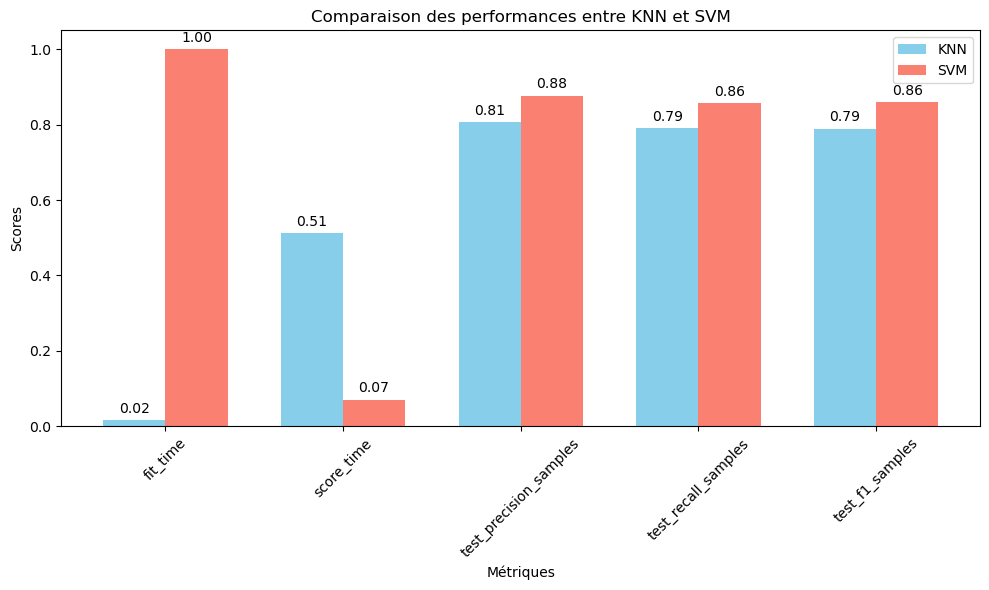

In [21]:
compare_classifiers(classifier1_scores=scores_knn, classifier2_scores=scores_svm, names=['KNN', 'SVM'])

**Q2 : Random forest**

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100)
scores_rf, report_rf = evaluate_classifier(rf_classifier, train_docs=vect_train_docs, train_labels=train_labels, test_docs=vect_test_docs, test_labels=test_labels)
# Affichage des résultats pour Random forest
display_classifier_results(scores_rf, "RF", report=report_rf)
pd.DataFrame(report_rf)

c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Résultats pour RF ---
Fit time : [21.01025486 22.21801066 21.797086  ]
Score time : [0.41162515 0.36629033 0.35211968]
test_precision_samples : [0.63561776 0.63949807 0.66747779]
test_recall_samples :  [0.61295735 0.61791077 0.65150315]
test_f1_samples : [0.61807014 0.62348716 0.65483854]

Rapport de classification :
{'0': {'precision': 0.9827338129496402, 'recall': 0.9499304589707928, 'f1-score': 0.9660537482319661, 'support': 719.0}, '1': {'precision': 1.0, 'recall': 0.43478260869565216, 'f1-score': 0.6060606060606061, 'support': 23.0}, '2': {'precision': 1.0, 'recall': 0.6428571428571429, 'f1-score': 0.782608695652174, 'support': 14.0}, '3': {'precision': 0.9090909090909091, 'recall': 0.6666666666666666, 'f1-score': 0.7692307692307693, 'support': 30.0}, '4': {'precision': 0.875, 'recall': 0.3888888888888889, 'f1-score': 0.5384615384615384, 'support': 18.0}, '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, '6': {'precision': 1.0, 'recall': 0.9444444444444

c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,micro avg,macro avg,weighted avg,samples avg
precision,0.982734,1.000000,1.000000,0.909091,0.875000,0.0,1.000000,1.000000,0.0,0.964286,...,0.878788,0.941176,0.915254,1.00,0.0,1.000000,0.952873,0.588761,0.915607,0.874097
recall,0.949930,0.434783,0.642857,0.666667,0.388889,0.0,0.944444,0.500000,0.0,0.964286,...,0.743590,0.432432,0.760563,0.60,0.0,0.461538,0.788462,0.365065,0.788462,0.856020
f1-score,0.966054,0.606061,0.782609,0.769231,0.538462,0.0,0.971429,0.666667,0.0,0.964286,...,0.805556,0.592593,0.830769,0.75,0.0,0.631579,0.862906,0.436503,0.836836,0.857557
support,719.000000,23.000000,14.000000,30.000000,18.000000,1.0,18.000000,2.000000,3.0,28.000000,...,117.000000,37.000000,71.000000,10.00,14.0,13.000000,3744.000000,3744.000000,3744.000000,3744.000000


**Comparaison avec SVM**

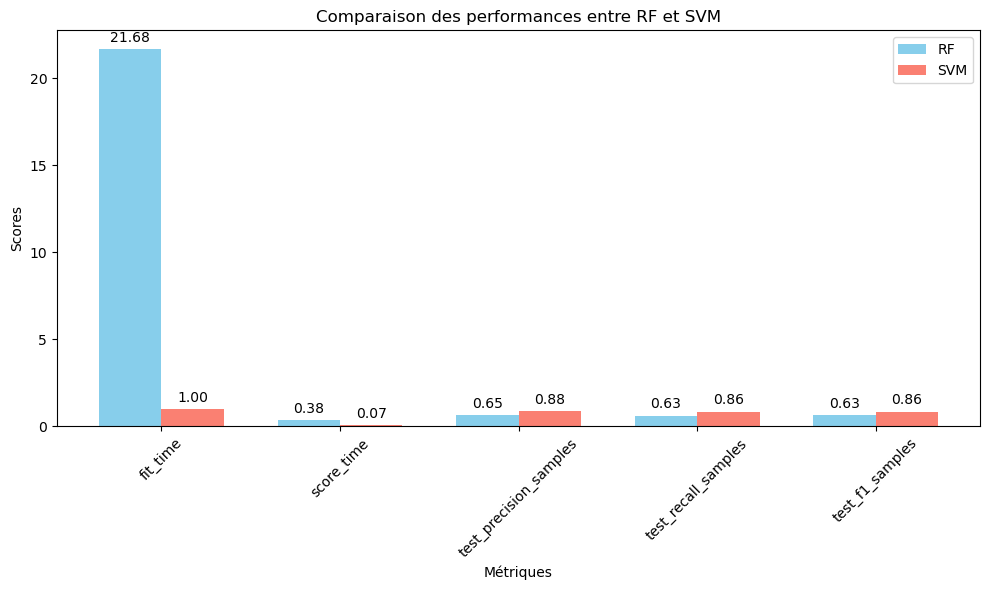

In [23]:
compare_classifiers(classifier1_scores=scores_rf, classifier2_scores=scores_svm, names=['RF', 'SVM'])

**Q3 : Perceptron multicouche**

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

svd = TruncatedSVD(n_components=500, random_state=42)
reduced_train_docs = svd.fit_transform(vect_train_docs)
reduced_test_docs = svd.transform(vect_test_docs)

# Step 2: Convert train_labels and test_labels to 1D
if train_labels.ndim == 2:
    train_labels = np.argmax(train_labels, axis=1)
if test_labels.ndim == 2:
    test_labels = np.argmax(test_labels, axis=1)

mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(50,), 
    activation='logistic', 
    solver='adam',
    random_state=42,
    max_iter=50,
    early_stopping=True
)
mlp_classifier.fit(reduced_train_docs, train_labels)

predicted_labels = mlp_classifier.predict(reduced_test_docs)

accuracy = accuracy_score(test_labels, predicted_labels)
print(f"Accuracy: {accuracy}")
print(classification_report(test_labels, predicted_labels))


Accuracy: 0.5836369658827426
              precision    recall  f1-score   support

           0       0.40      1.00      0.57       719
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        15
          12       0.00      0.00      0.00        48
          13       0.00      0.00      0.00        14
          15       0.00      0.00      0.00        24
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00       182
          18       0.00      0.00      0.00         

c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

def evaluate_classifier2(classifier, train_docs, train_labels, test_docs, test_labels):
    # Ensure labels are in single-label format
    if train_labels.ndim == 2:
        train_labels = np.argmax(train_labels, axis=1)
    if test_labels.ndim == 2:
        test_labels = np.argmax(test_labels, axis=1)
    
    # Perform cross-validation with macro metrics for multi-class classification
    scoring = ['precision_macro', 'recall_macro', 'f1_macro']
    scores = cross_validate(
        classifier, train_docs, train_labels, cv=3, scoring=scoring, return_train_score=False
    )
    
    # Fit the classifier on the entire training data
    classifier.fit(train_docs, train_labels)
    
    # Predict on the test data
    test_predict_labels = classifier.predict(test_docs)
    
    # Generate classification report
    report = classification_report(test_labels, test_predict_labels, output_dict=True)
    
    return scores, report

scores_mlp, report_mlp = evaluate_classifier2(mlp_classifier, train_docs=vect_train_docs, train_labels=train_labels, test_docs=vect_test_docs, test_labels=test_labels)

c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [28]:
scores_mlp

{'fit_time': array([ 65.64952683,  17.96768069, 122.32284617]),
 'score_time': array([0.01563287, 0.01339674, 0.0194273 ]),
 'test_precision_macro': array([0.25580788, 0.01843737, 0.27007634]),
 'test_recall_macro': array([0.19642831, 0.02764762, 0.21067415]),
 'test_f1_macro': array([0.20441517, 0.02051383, 0.21370082])}

MLP: [68.64668456713359, 0.016152302424112957, 0.0, 0.18144052831421323, 0.14491669546749816, 0.14620993974324525]
SVM: [0.9995741844177246, 0.0714112122853597, 0.0, 0.0, 0.0, 0.0]


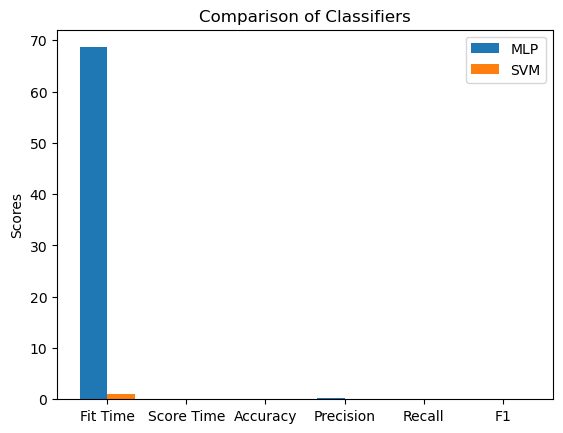

In [30]:
def compare_classifiers2(classifier1_scores, classifier2_scores, names):
    metrics = ['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_macro']
    
    classifier1_values = [
        np.mean(classifier1_scores.get('fit_time', 0)),
        np.mean(classifier1_scores.get('score_time', 0)),
        np.mean(classifier1_scores.get('test_accuracy', 0)),
        np.mean(classifier1_scores.get('test_precision_macro', 0)),
        np.mean(classifier1_scores.get('test_recall_macro', 0)),
        np.mean(classifier1_scores.get('test_f1_macro', 0))
    ]

    classifier2_values = [
        np.mean(classifier2_scores.get('fit_time', 0)),
        np.mean(classifier2_scores.get('score_time', 0)),
        np.mean(classifier2_scores.get('test_accuracy', 0)),
        np.mean(classifier2_scores.get('test_precision_macro', 0)),
        np.mean(classifier2_scores.get('test_recall_macro', 0)),
        np.mean(classifier2_scores.get('test_f1_macro', 0))
    ]

    # Display results
    print(f"{names[0]}: {classifier1_values}")
    print(f"{names[1]}: {classifier2_values}")

    # Optional visualization
    import matplotlib.pyplot as plt
    labels = ['Fit Time', 'Score Time', 'Accuracy', 'Precision', 'Recall', 'F1']
    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Bar width

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width / 2, classifier1_values, width, label=names[0])
    rects2 = ax.bar(x + width / 2, classifier2_values, width, label=names[1])

    ax.set_ylabel('Scores')
    ax.set_title('Comparison of Classifiers')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()


compare_classifiers2(classifier1_scores=scores_mlp, classifier2_scores=scores_svm, names=['MLP', 'SVM'])


# **Q4 : Sélection de caractéristiques avec SelectKBest**

In [31]:
from sklearn.feature_selection import SelectKBest, chi2

# Sélectionner les 1000 meilleures caractéristiques
selector = SelectKBest(score_func=chi2, k=1000)
vect_train_selected = selector.fit_transform(vect_train_docs, train_labels)
vect_test_selected = selector.transform(vect_test_docs)

In [32]:
vect_train_docs.shape

(7769, 34509)

**SVM**

In [ ]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

classifier_svm = OneVsRestClassifier(LinearSVC())

scores_SVM, report_SVM = evaluate_classifier(classifier_svm, train_docs=vect_train_docs, train_labels=train_labels, test_docs=vect_test_docs, test_labels=test_labels)
# Affichage des résultats pour SVM
display_classifier_results(scores_SVM, "SVM", report=report_SVM)
pd.DataFrame(report_SVM)



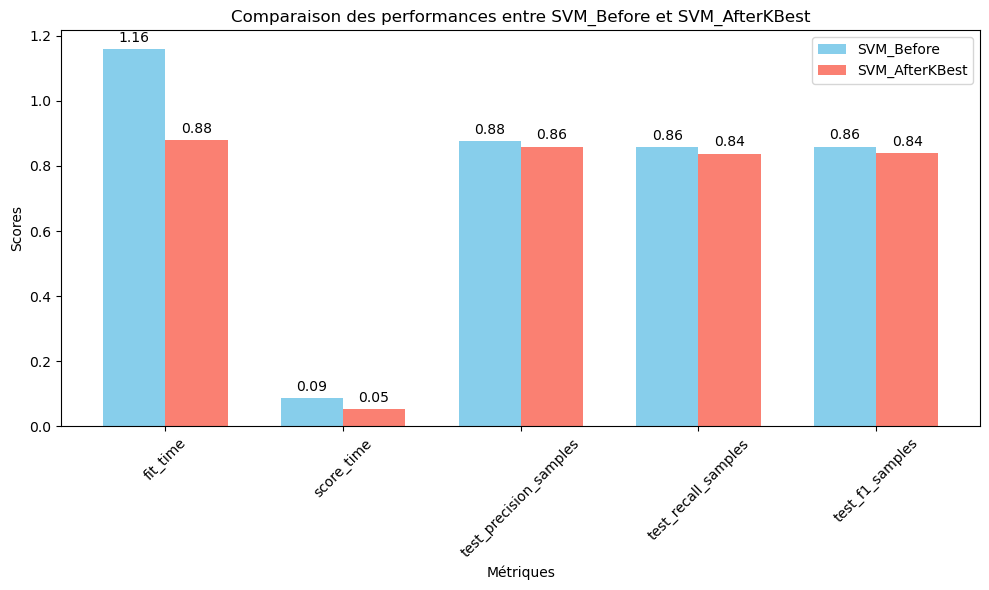

In [31]:
compare_classifiers(classifier1_scores=scores_svm, classifier2_scores=scores_SVM, names=['SVM_Before', 'SVM_AfterKBest'])

## **KNN**

In [32]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
scores_knn_skb, report_knn_skb = evaluate_classifier(knn_classifier, train_docs=vect_train_docs, train_labels=train_labels, test_docs=vect_test_docs, test_labels=test_labels)
# Affichage des résultats pour KNN
display_classifier_results(scores_knn_skb, "KNN", report=report_knn_skb)
pd.DataFrame(report_knn_skb)


c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Résultats pour KNN ---
Fit time : [0.01972294 0.02276611 0.03185987]
Score time : [0.79732585 0.71018267 0.57976723]
test_precision_samples : [0.78557272 0.80507079 0.8292069 ]
test_recall_samples :  [0.77133756 0.78746461 0.81302672]
test_f1_samples : [0.7679172  0.78770204 0.81245928]

Rapport de classification :
{'0': {'precision': 0.9827338129496402, 'recall': 0.9499304589707928, 'f1-score': 0.9660537482319661, 'support': 719.0}, '1': {'precision': 1.0, 'recall': 0.43478260869565216, 'f1-score': 0.6060606060606061, 'support': 23.0}, '2': {'precision': 1.0, 'recall': 0.6428571428571429, 'f1-score': 0.782608695652174, 'support': 14.0}, '3': {'precision': 0.9090909090909091, 'recall': 0.6666666666666666, 'f1-score': 0.7692307692307693, 'support': 30.0}, '4': {'precision': 0.875, 'recall': 0.3888888888888889, 'f1-score': 0.5384615384615384, 'support': 18.0}, '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, '6': {'precision': 1.0, 'recall': 0.944444444444444

c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,micro avg,macro avg,weighted avg,samples avg
precision,0.982734,1.000000,1.000000,0.909091,0.875000,0.0,1.000000,1.000000,0.0,0.964286,...,0.878788,0.941176,0.915254,1.00,0.0,1.000000,0.952873,0.588761,0.915607,0.874097
recall,0.949930,0.434783,0.642857,0.666667,0.388889,0.0,0.944444,0.500000,0.0,0.964286,...,0.743590,0.432432,0.760563,0.60,0.0,0.461538,0.788462,0.365065,0.788462,0.856020
f1-score,0.966054,0.606061,0.782609,0.769231,0.538462,0.0,0.971429,0.666667,0.0,0.964286,...,0.805556,0.592593,0.830769,0.75,0.0,0.631579,0.862906,0.436503,0.836836,0.857557
support,719.000000,23.000000,14.000000,30.000000,18.000000,1.0,18.000000,2.000000,3.0,28.000000,...,117.000000,37.000000,71.000000,10.00,14.0,13.000000,3744.000000,3744.000000,3744.000000,3744.000000


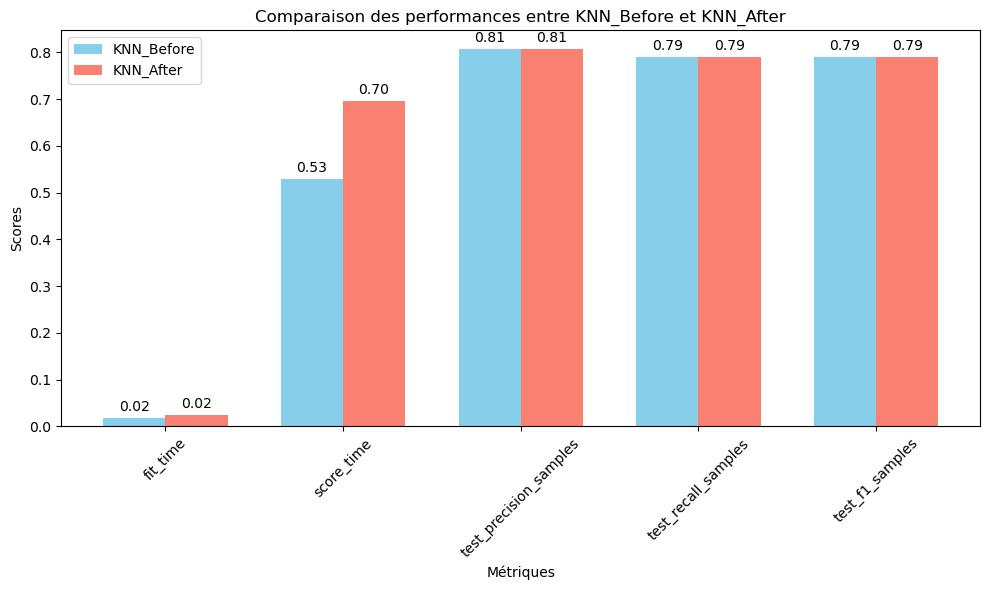

In [33]:
compare_classifiers(classifier1_scores=scores_knn, classifier2_scores=scores_knn_skb, names=['KNN_Before', 'KNN_After'])

### **Random Forest**

In [34]:

rf_classifier = RandomForestClassifier(n_estimators=100)
scores_rf_kbs, report_rf_kbs = evaluate_classifier(rf_classifier, train_docs=vect_train_docs, train_labels=train_labels, test_docs=vect_test_docs, test_labels=test_labels)
display_classifier_results(scores_rf_kbs, "RF", report=report_rf_kbs)
pd.DataFrame(report_rf_kbs)

c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Résultats pour RF ---
Fit time : [26.9270649  26.2157197  25.99020052]
Score time : [0.4175036  0.42927027 0.37000227]
test_precision_samples : [0.64295367 0.63229086 0.66825029]
test_recall_samples :  [0.62135457 0.61108966 0.65086233]
test_f1_samples : [0.62600055 0.61628162 0.65482567]

Rapport de classification :
{'0': {'precision': 0.9827338129496402, 'recall': 0.9499304589707928, 'f1-score': 0.9660537482319661, 'support': 719.0}, '1': {'precision': 1.0, 'recall': 0.43478260869565216, 'f1-score': 0.6060606060606061, 'support': 23.0}, '2': {'precision': 1.0, 'recall': 0.6428571428571429, 'f1-score': 0.782608695652174, 'support': 14.0}, '3': {'precision': 0.9090909090909091, 'recall': 0.6666666666666666, 'f1-score': 0.7692307692307693, 'support': 30.0}, '4': {'precision': 0.875, 'recall': 0.3888888888888889, 'f1-score': 0.5384615384615384, 'support': 18.0}, '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, '6': {'precision': 1.0, 'recall': 0.9444444444444

c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,micro avg,macro avg,weighted avg,samples avg
precision,0.982734,1.000000,1.000000,0.909091,0.875000,0.0,1.000000,1.000000,0.0,0.964286,...,0.878788,0.941176,0.915254,1.00,0.0,1.000000,0.952873,0.588761,0.915607,0.874097
recall,0.949930,0.434783,0.642857,0.666667,0.388889,0.0,0.944444,0.500000,0.0,0.964286,...,0.743590,0.432432,0.760563,0.60,0.0,0.461538,0.788462,0.365065,0.788462,0.856020
f1-score,0.966054,0.606061,0.782609,0.769231,0.538462,0.0,0.971429,0.666667,0.0,0.964286,...,0.805556,0.592593,0.830769,0.75,0.0,0.631579,0.862906,0.436503,0.836836,0.857557
support,719.000000,23.000000,14.000000,30.000000,18.000000,1.0,18.000000,2.000000,3.0,28.000000,...,117.000000,37.000000,71.000000,10.00,14.0,13.000000,3744.000000,3744.000000,3744.000000,3744.000000


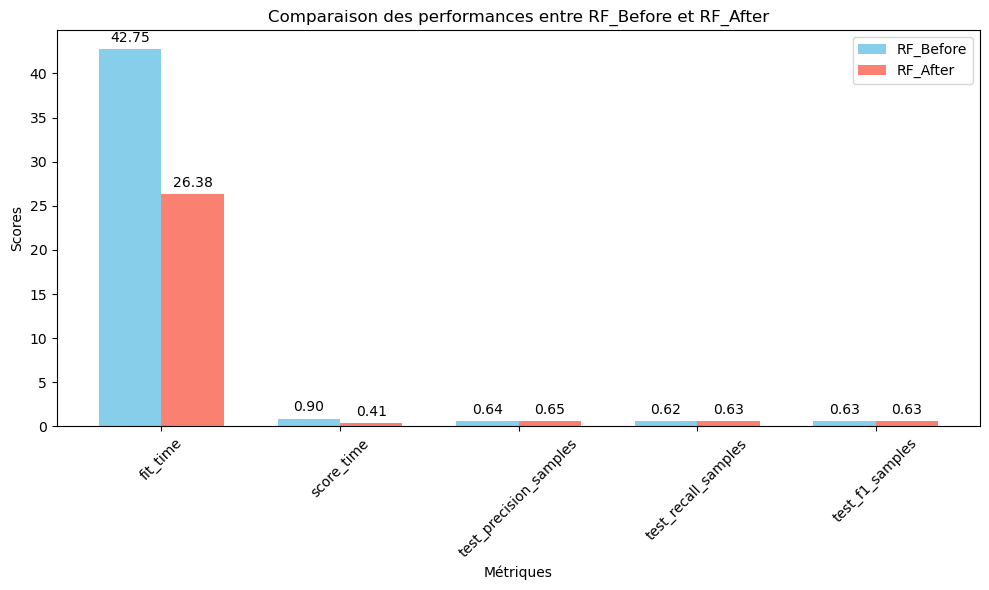

In [35]:
compare_classifiers(classifier1_scores=scores_rf, classifier2_scores=scores_rf_kbs, names=['RF_Before', 'RF_After'])

### **Perceptron multicouche**

In [ ]:

mlp_classifier =  MLPClassifier(activation='relu', solver='adam', random_state=42, max_iter=100)
scores_mlp_skb, report_mlp_skb = evaluate_classifier(mlp_classifier, train_docs=vect_train_docs, train_labels=train_labels, test_docs=vect_test_docs, test_labels=test_labels)
display_classifier_results(scores_mlp_skb, "mlp", report=report_mlp_skb)
pd.DataFrame(report_mlp_skb)

c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\dscon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} 

In [1]:
report_mlp_skb

NameError: name 'report_mlp_skb' is not defined

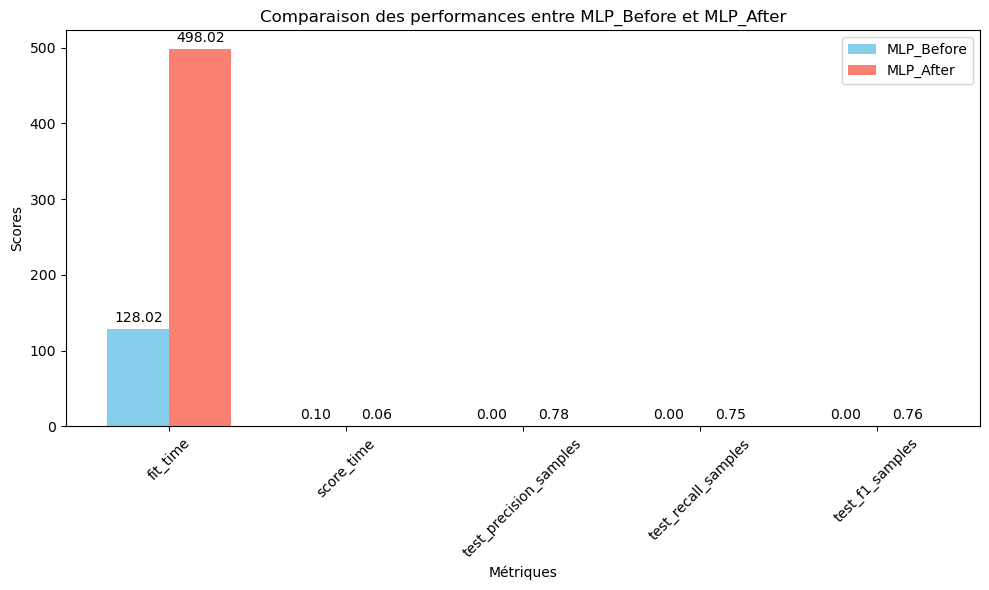

In [ ]:
compare_classifiers(classifier1_scores=scores_mlp, classifier2_scores=scores_mlp_skb, names=['MLP_Before', 'MLP_After'])

# Cross-Validation

# **Summary**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Liste des classificateurs et initialisation des résultats
classifiers = ['SVM', 'KNN', 'Random Forest', 'MLP']
results_before = []
results_after = []

# Helper function pour obtenir la moyenne de la précision ou traiter les valeurs float
def get_precision_mean(scores, key='test_precision_samples'):
    return scores[key].mean()

# Ajout des résultats de précision avant la sélection de caractéristiques
results_before.append(get_precision_mean(scores_svm))        
results_before.append(get_precision_mean(scores_knn))        
results_before.append(get_precision_mean(scores_rf))         
results_before.append(get_precision_mean(scores_mlp))        

# Ajout des résultats de précision après la sélection de caractéristiques
results_after.append(get_precision_mean(scores_SVM))        
results_after.append(get_precision_mean(scores_knn_skb))    
results_after.append(get_precision_mean(scores_rf_kbs))      
results_after.append(get_precision_mean(scores_mlp_skb)) 

# Création du DataFrame récapitulatif
summary_data = {
    'Classifier': classifiers,
    'Precision Before': results_before,
    'Precision After': results_after
}

summary_df = pd.DataFrame(summary_data)

# Affichage du tableau récapitulatif
print("Résumé de la Précision Avant et Après la Sélection de Caractéristiques")
summary_df

Résumé de la Précision Avant et Après la Sélection de Caractéristiques


,Classifier,Precision Before,Precision After
0,SVM,0.876636,0.859441
1,KNN,0.806617,0.806617
2,Random Forest,0.648175,0.644635
3,MLP,0.000000,0.775588


In [ ]:
scores_svm

{'fit_time': array([1.01328444, 1.14886451, 1.00400114]),
 'score_time': array([0.09167933, 0.07272625, 0.07480359]),
 'test_precision_samples': array([0.86643493, 0.88022803, 0.88324527]),
 'test_recall_samples': array([0.84632651, 0.86370184, 0.86209956]),
 'test_f1_samples': array([0.84841431, 0.86375468, 0.86505655])}